<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/19_Preprocess_Region_Data_for_Predicting_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pre-processing Gapminder Data to include Region for Prediction Life Expectancy - Ridge Regression**

The Gapminder Dataset describes life expentency depending on factors like fertility, GDP, Region, population etc.

The dataset is imported from Kaggle.

https://www.kaggle.com/

Installing Kaggle Package to access the Gapminder dataset from Kaggle.

In [0]:
!pip install kaggle

Make .kaggle directory under root to import the Kaggle Authentication JSON.

In [0]:
!mkdir ~/.kaggle

Change file path to root/.kaggle/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Protect Kaggle JSON file for security reasons

Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Import the Gapminder dataset

In [0]:
!kaggle datasets download -d deepakdodi/gapminder

  0% 0.00/5.43k [00:00<?, ?B/s]
100% 5.43k/5.43k [00:00<00:00, 9.84MB/s]


In [0]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the Gapminder file into a DataFrame: df
df = pd.read_csv('gapminder.zip', compression='zip', header=0, sep=',', quotechar='"')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


**Exploratory Data Visualization to determine the impact of Region on Life Expectancy**

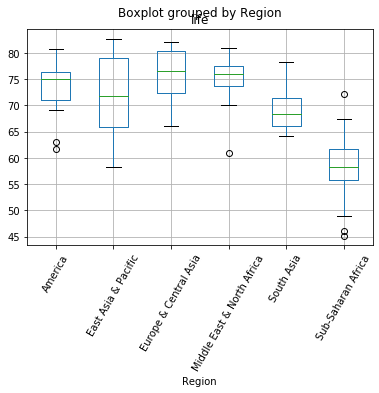

In [0]:
# Create a boxplot of life expectancy per region
df.boxplot('life','Region', rot=60)


**Creating dummy variables**

Scikit-learn does not accept non-numerical features. 

For the gapminder data, the 'Region' feature contains very useful information that helps to predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. 

Hence, it is important to retain the 'Region" feature while trying to predict life expectancy. 

Pre-processing for the 'Region' data is carried out to binarize it by creating dummy variables.

In [0]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

In [0]:
# Print the columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [0]:
# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

In [0]:
# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


**Regression with categorical features**

Create array X for the 'fertility' feature and array y for the 'life' target variable.

In [0]:
# Create arrays for features and target variable
y = df['life'].values
X_fertility = df.drop('life', axis = 1)

In [0]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [0]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.5, normalize=True)

In [0]:
# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

In [0]:
# Print the cross-validated scores
print(ridge_cv)

[0.87758867 0.80165479 0.86362808 0.8071264  0.86761116]
